In [5]:
# Churn Prediction Using Neural Networks and Random Forest

## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [6]:
## Load the Dataset

# Load the cleaned dataset (using the previously structured DataFrame `df`)
data = pd.read_csv('Churn_Modelling.csv')

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis (EDA)

In [8]:
### Dataset Information

print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min 

In [10]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


### Visualizations

<ipython-input-11-4392da9dfefd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette='coolwarm')


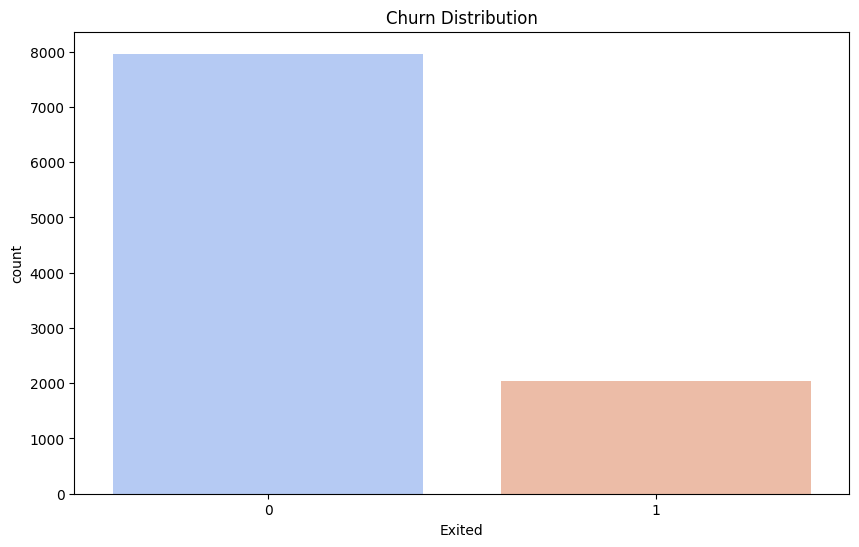

In [11]:
#### Churn Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Exited', data=data, palette='coolwarm')
plt.title('Churn Distribution')
plt.show()

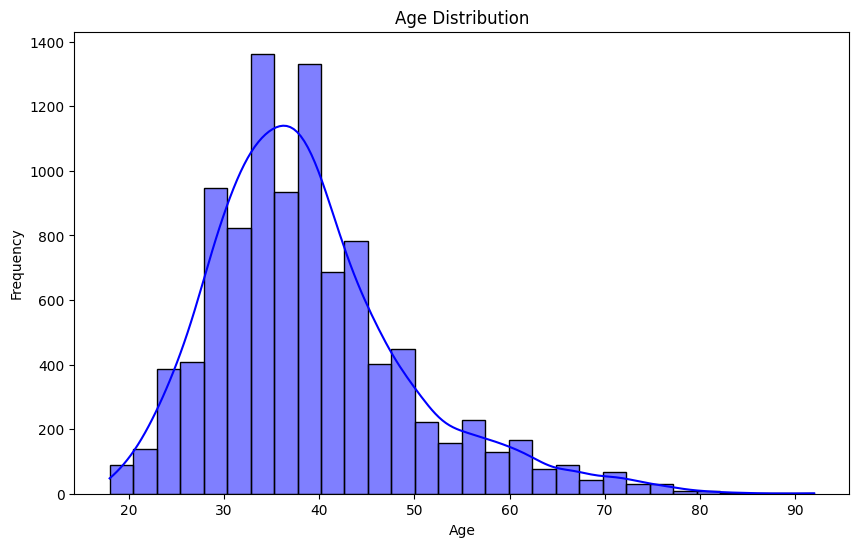

In [12]:
#### Age Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-2c3a496c2c72>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=data, palette='coolwarm')


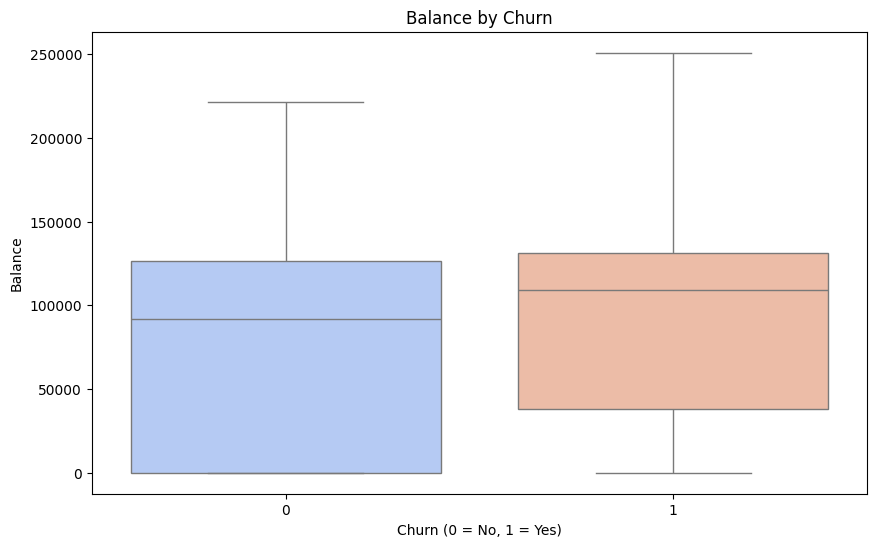

In [14]:
#### Balance by Churn

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=data, palette='coolwarm')
plt.title('Balance by Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Balance')
plt.show()

## Data Preprocessing

In [15]:
### Encoding Categorical Variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male=1, Female=0

data = pd.get_dummies(data, columns=['Geography'], drop_first=True)  # One-hot encoding for Geography

In [16]:
### Feature Selection

# Update relevant features to include one-hot encoded columns
relevant_features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']

# Splitting features and target variable
X = data[relevant_features]
y = data['Exited']


### Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
### Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
### Training the Model

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


### Predictions and Evaluation
# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluation for Random Forest
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

Random Forest Confusion Matrix:
[[1551   56]
 [ 211  182]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000


Random Forest Accuracy Score:
0.8665


## Model 2: Neural Network

In [19]:
### Building the Model

nn_model = Sequential()
nn_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
### Training the Model

history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


### Predictions and Evaluation

# Predictions using Neural Network
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")

# Evaluation for Neural Network
print("Neural Network Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))

print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

print("\nNeural Network Accuracy Score:")
print(accuracy_score(y_test, y_pred_nn))



Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6798 - loss: 0.6142 - val_accuracy: 0.7994 - val_loss: 0.4659
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7990 - loss: 0.4656 - val_accuracy: 0.8194 - val_loss: 0.4274
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7975 - loss: 0.4531 - val_accuracy: 0.8313 - val_loss: 0.4095
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8125 - loss: 0.4347 - val_accuracy: 0.8344 - val_loss: 0.3951
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8197 - loss: 0.4211 - val_accuracy: 0.8438 - val_loss: 0.3846
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8358 - loss: 0.3978 - val_accuracy: 0.8531 - val_loss: 0.3751
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8284 - loss: 0.3995 - val_accuracy: 0.8512 - val_loss: 0.3662
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8462 - loss: 0.3821 - val_accuracy: 0.

## Comparison of Models

<ipython-input-21-619fc566e900>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='coolwarm')


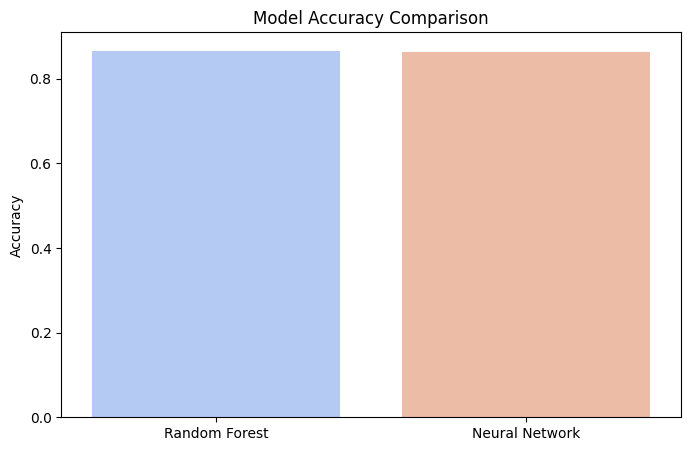

In [21]:
### Visualizing Model Accuracies

models = ['Random Forest', 'Neural Network']
accuracies = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_nn)]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()